   # ANALYSIS OF SUPERSTORE SALES DATASET

OBJECTIVE:   Analyze retail sales data to derive insights into customer behavior, popular
products, and sales trends

### IMPORTING THE DATA

In [1]:
#import the necessary data visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  #to ignore the warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv('train.csv')

### DATA EXPLORATION

In [3]:
#display the first 5 rows of the dataset
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### About the Dataset

In [4]:
#Number of rows and columns
df.shape

(9800, 18)

There are 9800 rows and 18 columns.

In [5]:
#Name of the Columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
#Data type of the columns
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
#Statistical description of the data
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df['Row ID'].value_counts()

1       1
6537    1
6530    1
6531    1
6532    1
       ..
3268    1
3269    1
3270    1
3271    1
9800    1
Name: Row ID, Length: 9800, dtype: int64

In [10]:
df['Order ID'].value_counts()

CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order ID, Length: 4922, dtype: int64

In [11]:
df['Order Date'].value_counts()

05/09/2017    38
10/11/2017    35
02/12/2018    34
01/12/2018    34
02/09/2018    33
              ..
25/02/2017     1
25/10/2017     1
21/02/2015     1
11/09/2015     1
09/05/2016     1
Name: Order Date, Length: 1230, dtype: int64

In [12]:
df['Ship Date'].value_counts()

26/09/2018    34
06/12/2018    32
16/12/2016    31
15/09/2018    30
06/09/2018    30
              ..
10/07/2015     1
29/03/2016     1
14/06/2016     1
10/01/2018     1
13/05/2016     1
Name: Ship Date, Length: 1326, dtype: int64

In [13]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [14]:
df['Customer ID'].value_counts()

WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: Customer ID, Length: 793, dtype: int64

In [15]:
df['Customer Name'].value_counts()

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64

In [16]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [17]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [18]:
df['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [19]:
df['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [20]:
df['Postal Code'].value_counts()

10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: Postal Code, Length: 626, dtype: int64

In [21]:
df['Region'].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [22]:
df['Product ID'].value_counts()

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
                   ..
OFF-PA-10000919     1
TEC-MA-10003353     1
OFF-LA-10003388     1
OFF-EN-10004206     1
TEC-PH-10002645     1
Name: Product ID, Length: 1861, dtype: int64

In [23]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [24]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [25]:
df['Product Name'].value_counts()

Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: Product Name, Length: 1849, dtype: int64

In [26]:
df['Sales'].value_counts()

12.960     55
15.552     39
19.440     39
10.368     35
25.920     34
           ..
339.136     1
60.048      1
5.022       1
7.857       1
10.384      1
Name: Sales, Length: 5757, dtype: int64

### DATA CLEANING

In [27]:
#Checking null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

The column Postal Code has 11 null values

In [28]:
#Removing null values
df=df.dropna()

In [30]:
#Check if duplicates are there or not
df.duplicated().sum()

0

In [31]:
#Convert Data Types
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

#Added columns for analysis purpose
df["order_year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month

df["Ship_year"]=df["Ship Date"].dt.year
df["Ship_month"]=df["Ship Date"].dt.month

In [32]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,Ship_year,Ship_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10


### EXPLORATORY DATA ANALYSIS(EDA) & DESCRIPTIVE STATISTICS

In [33]:
#Number of unique values in each column
df.nunique()

Row ID           9789
Order ID         4916
Order Date       1229
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              48
Postal Code       626
Region              4
Product ID       1860
Category            3
Sub-Category       17
Product Name     1848
Sales            5750
order_year          4
order_month        12
Ship_year           5
Ship_month         12
dtype: int64

In [34]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
order_year                int64
order_month               int64
Ship_year                 int64
Ship_month                int64
dtype: object

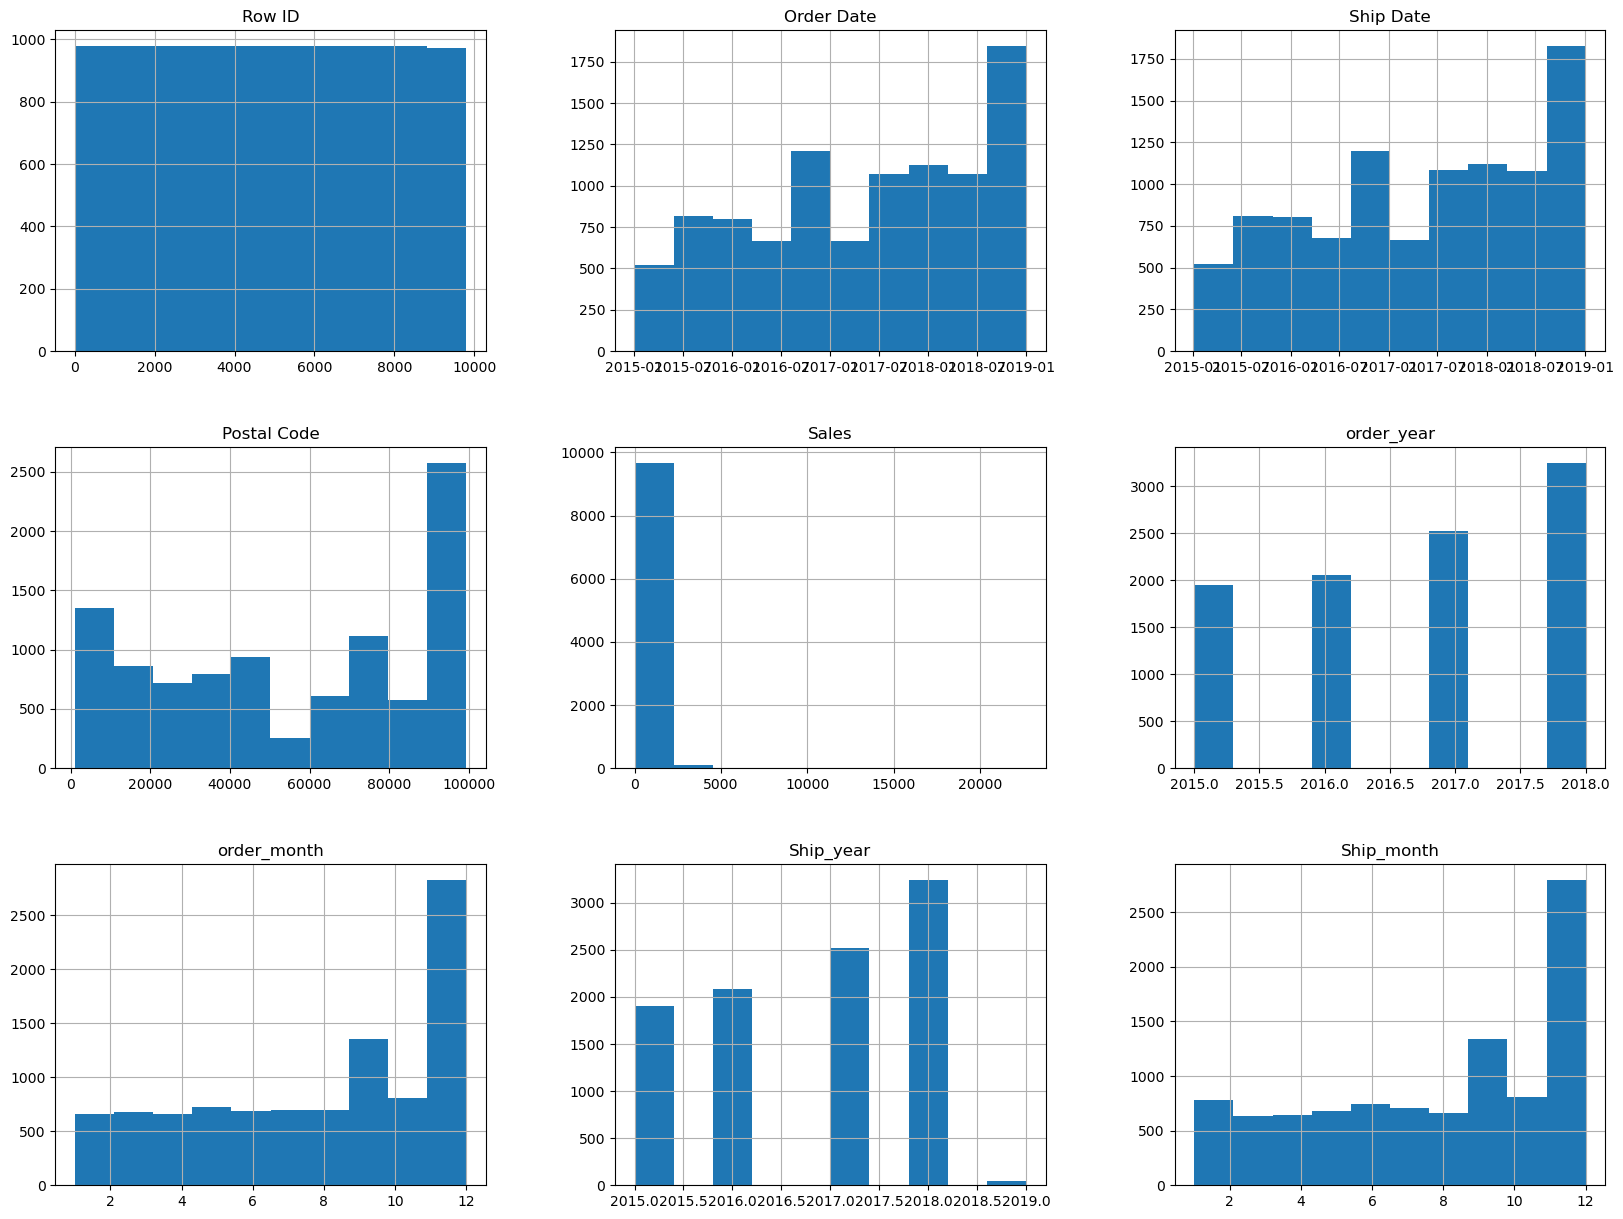

In [35]:
#Histogram to check the distribution of each column
freqgraph=df.select_dtypes(include=['float','int','object','datetime'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [37]:
# Calculate total sales
total_sales = df['Sales'].sum()

print("Total Sales:", total_sales)

Total Sales: 2252607.4127


In [38]:
# Calculate total number of orders
total_orders = df['Order ID'].nunique()

# Calculate average order value
average_order_value = total_sales / total_orders

print("Average Order Value:", average_order_value)


Average Order Value: 458.2195713384866


In [39]:
#Calculate average sales per order

print('Average Sales per Order:', df['Sales'].mean())

Average Sales per Order: 230.1161929410515


In [40]:
#Calculate Average Sales per Customer

print('Average Sales per Customer:' ,df.groupby('Customer ID')['Sales'].sum().mean())

Average Sales per Customer: 2840.6146440100897


In [41]:
#Calculate Average Sales per Product

print('Average Sales per Product:', df.groupby('Product ID')['Sales'].sum().mean())

Average Sales per Product: 1211.0792541397818


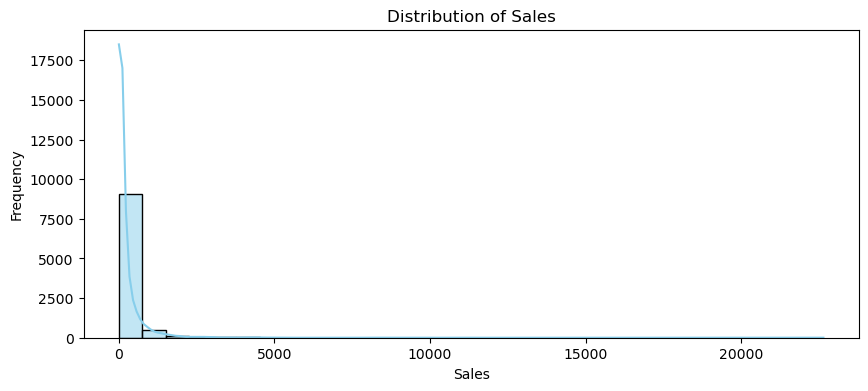

In [42]:
# Plotting the distribution of Sales
plt.figure(figsize = (10,4))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

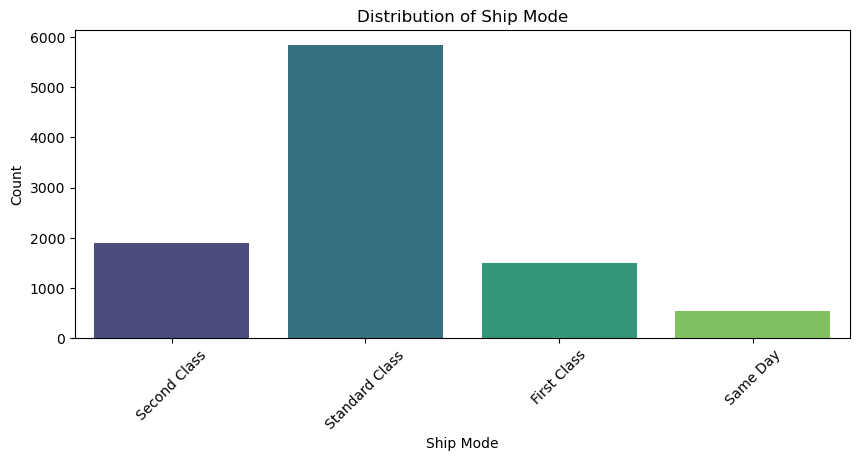

In [43]:
# Plotting the distribution of Ship Mode
plt.figure(figsize=(10,4))
sns.countplot(x='Ship Mode', data=df, palette='viridis')
plt.title('Distribution of Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


It is observed that maximum shipment mode ws through standard class

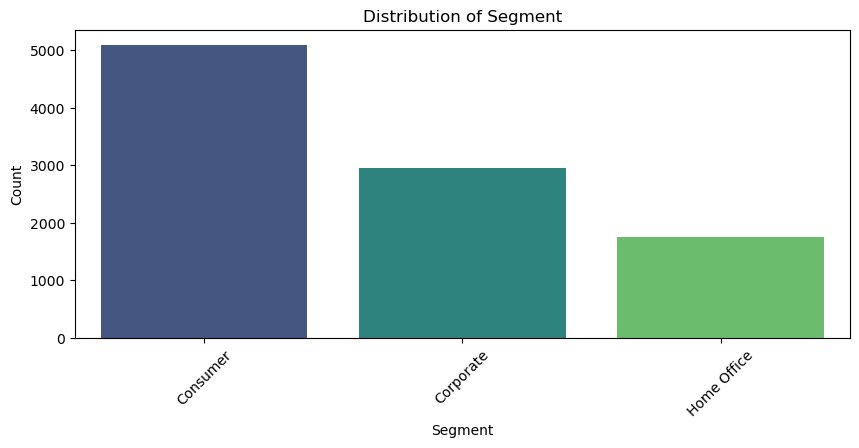

In [44]:
# Plotting the distribution of Segment
plt.figure(figsize=(10,4))
sns.countplot(x='Segment', data=df, palette='viridis')
plt.title('Distribution of Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Consumers have done the highest sales

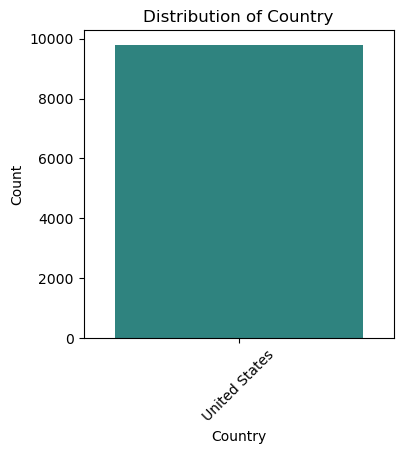

In [45]:
# Plotting the distribution of Country (assuming it's the same country for all rows)
plt.figure(figsize=(4,4))
sns.countplot(x='Country', data=df, palette='viridis')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Only United States was the country present in the sales column

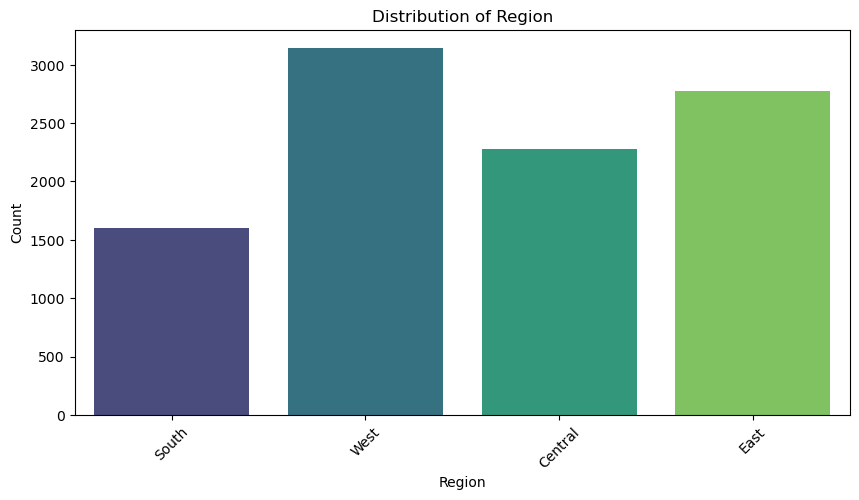

In [42]:
# Plotting the distribution of Region
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=df, palette='viridis')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Highest sales have been done in the western region of United States

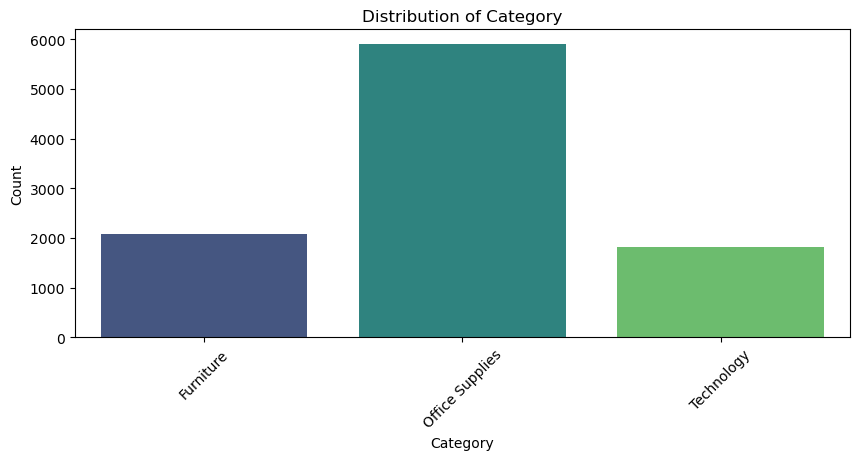

In [48]:
# Plotting the distribution of Category
plt.figure(figsize=(10,4))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Office supplies was sold in maximum number

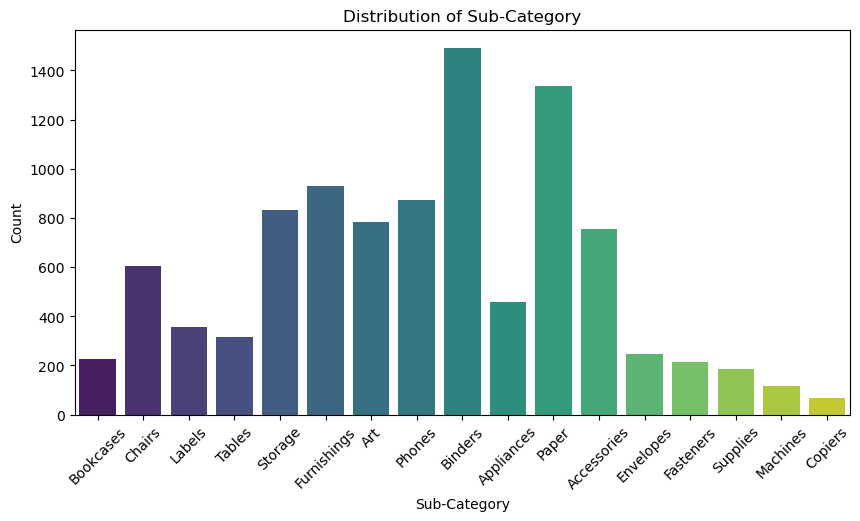

In [44]:
# Plotting the distribution of Sub-Category
plt.figure(figsize=(10,5))
sns.countplot(x='Sub-Category', data=df, palette='viridis')
plt.title('Distribution of Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Out of the office supplies category binders was more sold and copiers was the least sold

<AxesSubplot:>

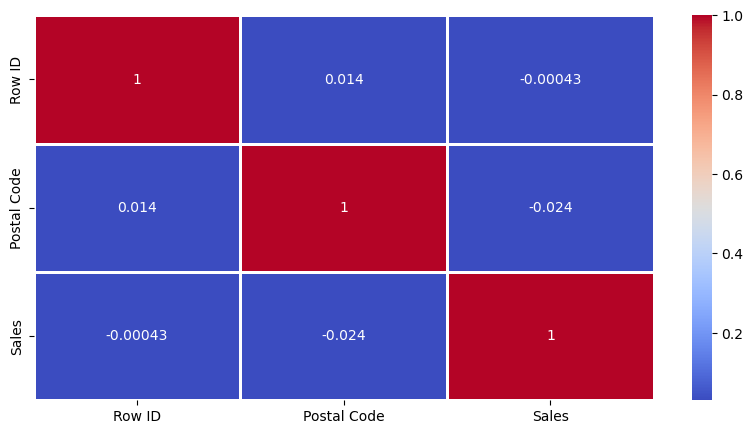

In [51]:
#Multivariate Analysis using heatmap
cols=['Row ID', 'Order ID','Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales']
corrmatrix=df[cols].corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,vmin=0.03,vmax=1,linewidth=2,cmap='coolwarm')

### CUSTOMER SEGMENTATION

In [45]:
# Calculate Recency, Frequency, and Monetary Value for each customer
rfm_data = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (pd.Timestamp.now() - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary Value
}).reset_index()

# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Print the first few rows of the RFM data
print(rfm_data.head())


  Customer ID  Recency  Frequency  Monetary
0    AA-10315     2093         11  5563.560
1    AA-10375     1928         15  1056.390
2    AA-10480     2168         12  1790.512
3    AA-10645     1964         18  5086.935
4    AB-10015     2324          6   886.156


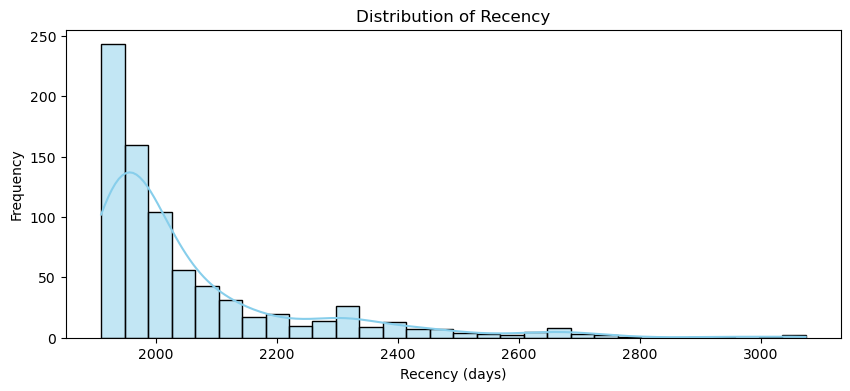

In [66]:
# Visualize the distribution of Recency
plt.figure(figsize=(10, 4))
sns.histplot(rfm_data['Recency'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

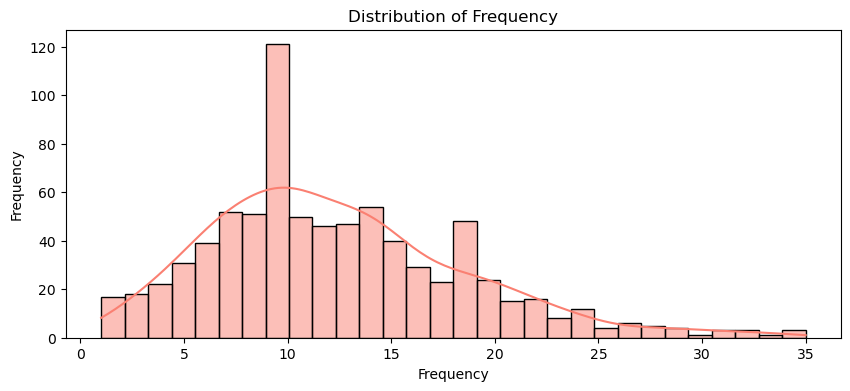

In [67]:
# Visualize the distribution of Frequency
plt.figure(figsize=(10, 4))
sns.histplot(rfm_data['Frequency'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()


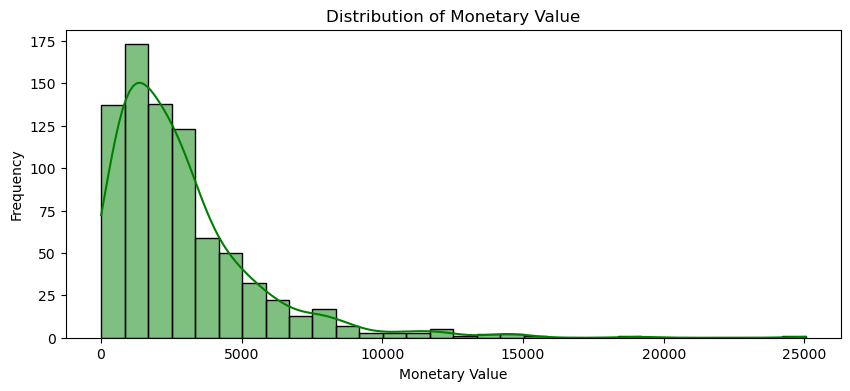

In [68]:
# Visualize the distribution of Monetary Value
plt.figure(figsize=(10, 4))
sns.histplot(rfm_data['Monetary'], bins=30, kde=True, color='green')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

In [49]:
from sklearn.cluster import KMeans

# Select the RFM columns for clustering
X = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Define the number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(X)

# Analyze the characteristics of each customer segment
segment_analysis = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).reset_index()

# Rename columns for clarity
segment_analysis.columns = ['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Num_Customers']

# Print the characteristics of each customer segment
print(segment_analysis)


   Cluster  Avg_Recency  Avg_Frequency  Avg_Monetary  Num_Customers
0        0  2085.106996       9.773663   1361.667614            486
1        1  2045.169811      20.056604  10039.014585             53
2        2  2008.216535      15.653543   4168.382595            254


Based on the provided output, we have three customer segments identified by the clusters:


- **Cluster 0**: This segment may represent regular or moderate-value customers who make purchases less frequently compared to other segments. They might be less engaged or have lower spending power. This segment has an average recency of approximately 2084 days, an average frequency of around 9.77 purchases, and an average monetary value of about $1361.67. There are 486 customers in this segment.


- **Cluster 1**: This segment represents high-value customers who make frequent purchases. They could be considered as the most valuable customers, contributing significantly to the overall revenue. Targeted marketing strategies to retain and upsell to these customers could be beneficial. This segment shows an average recency of approximately 2044 days, indicating that these customers made purchases relatively recently. They have a significantly higher average frequency of around 20.06 purchases and a substantially higher average monetary value of approximately $10039.01 compared to the other segments. However, this segment comprises a smaller number of customers, with only 53 in total.


- **Cluster 2**: This segment represents customers who are moderately engaged and have a moderate spending level. They could be considered as valuable customers, but with slightly lower spending compared to Cluster 1. Strategies to increase their purchase frequency or encourage higher-value purchases might be effective.These customers have an average recency of about 2007 days, slightly lower than Cluster 0 and 1. They have an average frequency of approximately 15.65 purchases and an average monetary value of roughly $4168.38. There are 254 customers in this segment.



### PRODUCT ANALYSIS

In [50]:
# Identify the top-selling products
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 Selling Products:")
print(top_selling_products)

# Identify the top-selling categories
top_selling_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

print("\nTop Selling Categories:")
print(top_selling_categories)


Top 10 Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

Top Selling Categories:
Category
Technology

### TIME SERIES ANALYSIS

Text(0, 0.5, 'Sales')

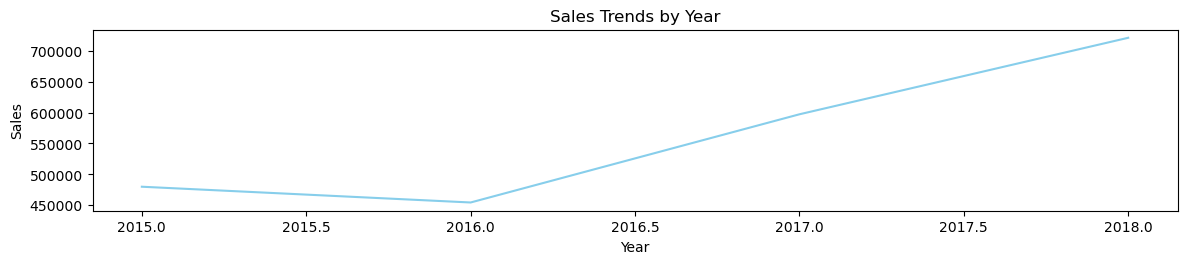

In [51]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year, month, and day from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

# Aggregate sales data by different time periods
sales_by_year = df.groupby('Year')['Sales'].sum()
sales_by_month = df.groupby(['Year', 'Month'])['Sales'].sum()
sales_by_day = df.groupby(['Year', 'Month', 'Day'])['Sales'].sum()

# Plot sales trends over different time periods
plt.figure(figsize=(14, 8))

# Sales trends by year
plt.subplot(3, 1, 1)
sales_by_year.plot(kind='line', color='skyblue')
plt.title('Sales Trends by Year')
plt.xlabel('Year')
plt.ylabel('Sales')


Text(0, 0.5, 'Sales')

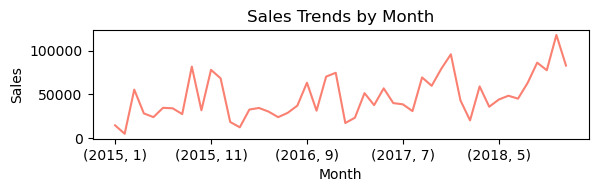

In [52]:
# Sales trends by month
plt.subplot(3, 1, 2)
sales_by_month.plot(kind='line', color='salmon')
plt.title('Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Sales')

Maximum number of sales was happened in 2017 and later.

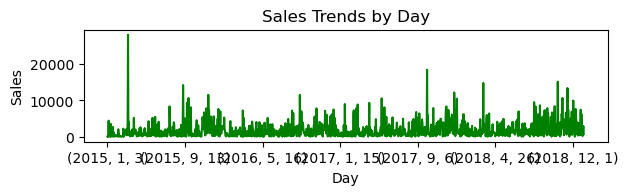

In [53]:
# Sales trends by day
plt.subplot(3, 1, 3)
sales_by_day.plot(kind='line', color='green')
plt.title('Sales Trends by Day')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


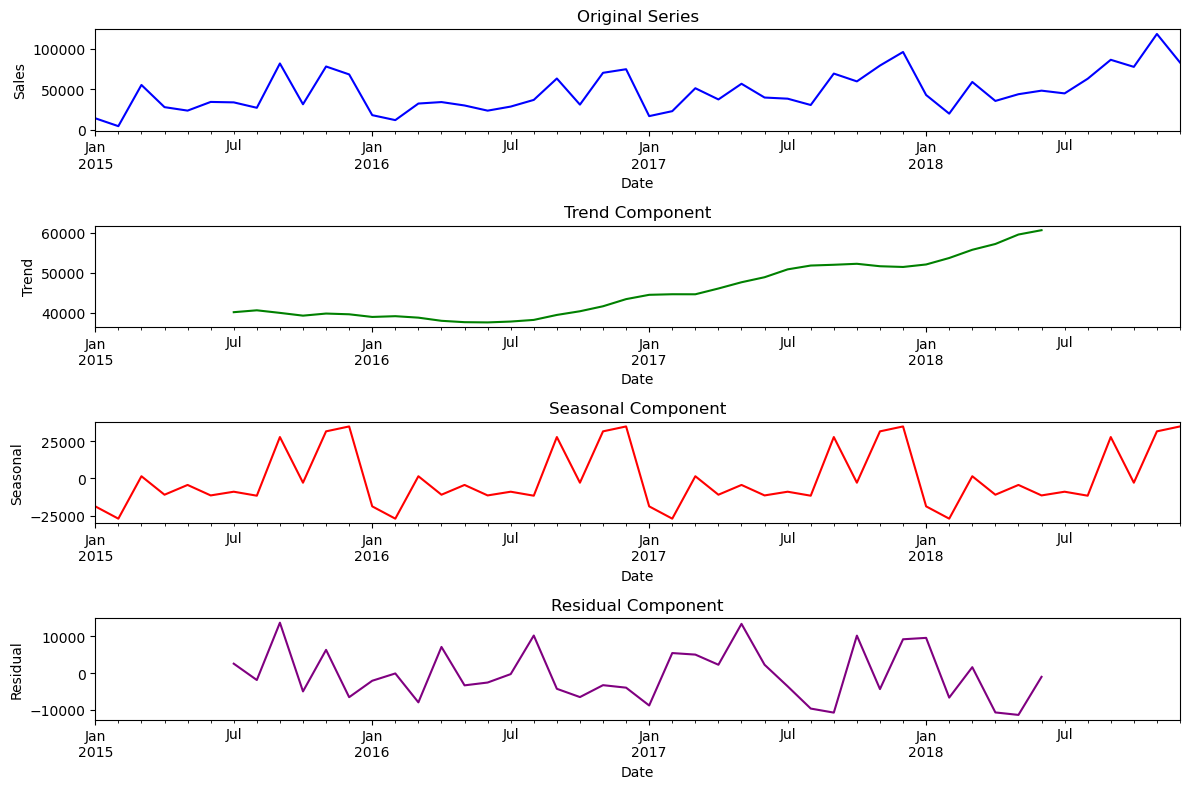

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample the data to a monthly frequency and fill missing values (if any)
monthly_sales = df['Sales'].resample('M').sum().fillna(0)

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original series
plt.subplot(4, 1, 1)
monthly_sales.plot(color='blue')
plt.title('Original Series')
plt.xlabel('Date')
plt.ylabel('Sales')

# Trend component
plt.subplot(4, 1, 2)
decomposition.trend.plot(color='green')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

# Seasonal component
plt.subplot(4, 1, 3)
decomposition.seasonal.plot(color='red')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')

# Residual component
plt.subplot(4, 1, 4)
decomposition.resid.plot(color='purple')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


Based on the insights derived from the analysis of the Superstore sales data, some of the recommendations are:

1. **Target High-Value Customer Segments**:
   - Identify and prioritize high-value customer segments, such as those with high frequency and monetary value. Develop targeted marketing campaigns, loyalty programs, and personalized offers to retain these customers and encourage repeat purchases.


2. **Improve Customer Experience**:
   - Focus on enhancing the overall customer experience across all touchpoints, including online platforms, physical stores, and customer service interactions. Provide personalized recommendations, streamline the purchasing process, and offer convenient delivery options to ensure customer satisfaction and loyalty.

3. **Monitor and Adjust Strategies**:
   - Continuously monitor key performance indicators (KPIs) such as sales volume, customer retention rate, and average order value. Regularly review and analyze sales data to identify emerging trends, opportunities, and challenges. Adjust marketing strategies, pricing strategies, and product offerings based on real-time insights to stay competitive in the market.

